<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/BDA(%ED%8C%90%EB%8B%A4%EC%8A%A4)/%EA%B3%BC%EC%A0%9C/%ED%95%84%EC%88%984_%EC%9D%B4%EA%B0%80%EC%98%8141_0119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필수과제4
- 필수과제3번에서 가장 많은 범죄가 있는 지역 5개와 가장 적은 범죄가 있는 지역 5개를 seasonal_decompose 하여서
- 차이를 분석해 주세요 (어떤 트렌드가 있는지?, 실제 범죄가 많은 곳과 적은 곳의 차이가 존재하는지?)


In [ ]:
import pandas as pd
df=pd.read_csv('crime.csv')

In [ ]:
# 범죄 발생 지역별 카운트 계산
crime_counts = df[df['IS_CRIME'] == 1].groupby(['GEO_LAT', 'GEO_LON']).size().reset_index(name='COUNT')

# 상위 5개 지역
top_crime_locations = crime_counts.nlargest(5, 'COUNT')

# 하위 5개 지역
bottom_crime_locations = crime_counts.nsmallest(5, 'COUNT')


In [ ]:
# 상위 지역의 시계열 데이터 생성
top_time_series = df[df[['GEO_LAT', 'GEO_LON']].apply(tuple, axis=1).isin(top_crime_locations[['GEO_LAT', 'GEO_LON']].apply(tuple, axis=1))].groupby(['REPORTED_DATE']).size().reset_index(name='COUNT')

# 하위 지역의 시계열 데이터 생성
bottom_time_series = df[df[['GEO_LAT', 'GEO_LON']].apply(tuple, axis=1).isin(bottom_crime_locations[['GEO_LAT', 'GEO_LON']].apply(tuple, axis=1))].groupby(['REPORTED_DATE']).size().reset_index(name='COUNT')


In [ ]:
# 상위 지역 시계열 데이터
top_time_series['REPORTED_DATE'] = pd.to_datetime(top_time_series['REPORTED_DATE'])
top_time_series.set_index('REPORTED_DATE', inplace=True)
top_time_series = top_time_series.resample('D').sum().fillna(0)  # 일 단위로 재조정

# 하위 지역 시계열 데이터
bottom_time_series['REPORTED_DATE'] = pd.to_datetime(bottom_time_series['REPORTED_DATE'])
bottom_time_series.set_index('REPORTED_DATE', inplace=True)
bottom_time_series = bottom_time_series.resample('D').sum().fillna(0)  # 일 단위로 재조정

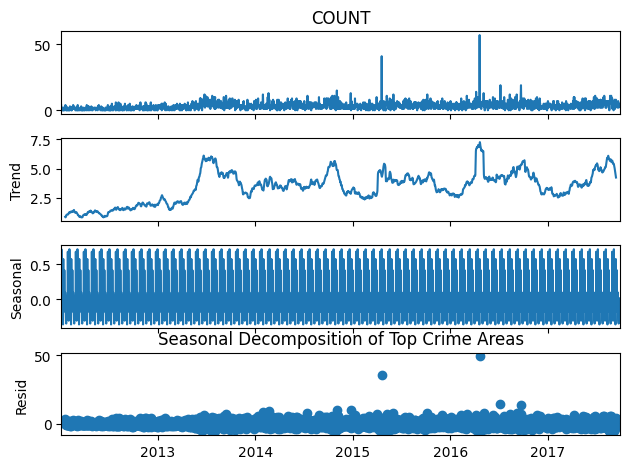

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 상위 지역 시계열 분해
top_decomposition = seasonal_decompose(top_time_series['COUNT'], model='additive', period=30)  # 30일 주기
top_decomposition.plot()
plt.title('Seasonal Decomposition of Top Crime Areas')
plt.show()

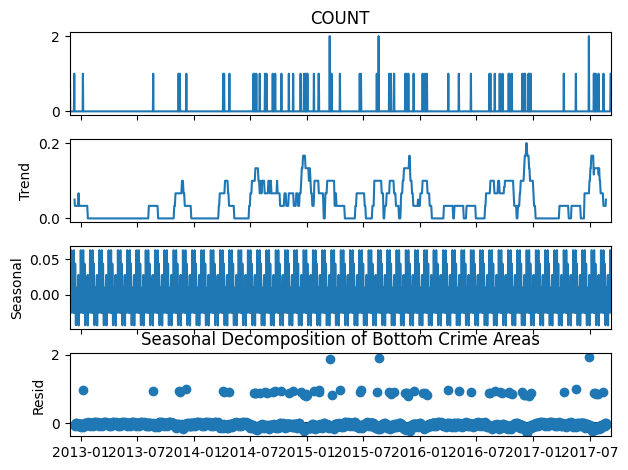

In [ ]:
# 하위 지역 시계열 분해
bottom_decomposition = seasonal_decompose(bottom_time_series['COUNT'], model='additive', period=30)  # 30일 주기
bottom_decomposition.plot()
plt.title('Seasonal Decomposition of Bottom Crime Areas')
plt.show()